# Assignment 2

In [2]:
# system tools
import os
import sys

# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

In [3]:
# load the data to pandas csv

filepath= os.path.join("..","..","cds-language", "data", "fake_or_real_news.csv")
news_data = pd.read_csv(filepath)

In [4]:
# create data variables containing data and labels

X = news_data["text"]
y = news_data["label"]

In [5]:
# make train/test split 

X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

In [6]:
#load in vectorized data
import scipy as sp

X_test_feats = sp.sparse.load_npz('../feature_extracted_object/X_test_feats.npz')
X_train_feats = sp.sparse.load_npz('../feature_extracted_object/X_train_feats.npz')

In [13]:
# fit the classifier to the data
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

In [14]:
# get predictions
y_pred = classifier.predict(X_test_feats)

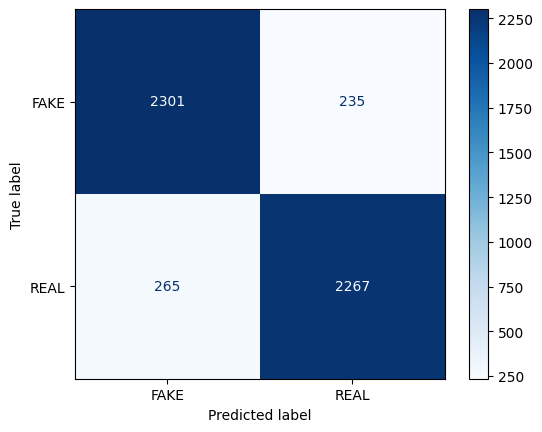

In [15]:
# use confusion matrix to check performance

metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

In [18]:
# get classification report

classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

#Save the report in out
filepath = "../out/NN_classification_report.txt"

with open(filepath, 'w') as file:
    file.write(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.89      0.88      0.89       628
        REAL       0.88      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [17]:
from joblib import dump, load

#save the trained model in the models folder 
dump(classifier, "../models/log_classifier.joblib")

['../models/log_classifier.joblib']